# Lending Clubs Case Study

#### Problem Statement / Objective

##### When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    ##### 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    
    ##### 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

##### We have to screen the applicants so that no potential defaulter is approved a loan. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### Solution 

##### As part of the solution, we will be performing the Exploratory Data Analysis on the Borrower dataset we have. 

In [2]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [124]:
# Load the dataset
df = pd.read_csv(r"C:\\Machine Learning Drive\\Lending Club Case Study Data\\loan.csv")
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\98084388.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\\Machine Learning Drive\\Lending Club Case Study Data\\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [96]:
df.shape

(39717, 111)

We have total 39717 rows and 111 columns in our dataset.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


###### Column analysis
Out of 111 columns, we have 74 columns with datatype float64, 13 columns as int64, 24 columns as object type columns.

### Clean the dataset

#### 1. First step is to remove the columns which have no relevant information. i.e. have Null values.

In [125]:
# After going through the data dictionary, we can see that there are many columns which do not not have any information i.e. have Null values.
# So lets drop these columns.
df.dropna(axis=1, how='all', inplace=True)

In [126]:
print(df.shape)
df.info()

(39717, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc         

After dropping the empty columns, now we have only 57 columns. By datatype float = 20, int64 = 13, and object = 24

#### 2. Next we will check how many null values are present in each column and get rid of them.

In [127]:
# get all the empty cells. DataFrame.isnull() gives us the null rows.
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Above details do not give a very good understanding of then empty values in the column. So lets check their percentages. 

In [128]:
# Rounding off to 2 decimal point for better understanding.
round(100*df.isnull().sum()/len(df), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

Few columns have more than 90% empty rows or null values. We will not be able to perform any anslysis on these columns.

Lets set the standard as 90%. We will remove any column which has move than 90% of rows empty. 

In [129]:
# Lets remove columns with more than 90% of the values.
row_count=df.shape[0]
remove_col1 = list(df.columns[100*(df.isnull().sum()/row_count)>90])
remove_col1

['mths_since_last_record', 'next_pymnt_d']

Apart from that we have 2 columns with high missing values. These columns are desc (32.59) and mths_since_last_delinq (64.66). 

Based on the Data Dictionary, we can understand that they are not really useful for our analysis. So we will remove them.

In [130]:
remove_col1.append('desc')
remove_col1.append('mths_since_last_delinq')

Lets examine other columns now. 

In [131]:
#lets check unique values in each column using below function.
df.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

Looking at the data, we can see that these columns have only 1 value. These might not be useful for our analysis. Lets check them one by one.

In [132]:
#below columns have only 1 value in them. So lets get rid of them.
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

Lets clean some columns before we remove more columns.

In [133]:
# get the value count 
single_value_cols = list(df.columns[df.nunique()==1])
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [134]:
for column in single_value_cols:
    print(df[column].value_counts())

pymnt_plan
n    39717
Name: count, dtype: int64
initial_list_status
f    39717
Name: count, dtype: int64
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
policy_code
1    39717
Name: count, dtype: int64
application_type
INDIVIDUAL    39717
Name: count, dtype: int64
acc_now_delinq
0    39717
Name: count, dtype: int64
chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
delinq_amnt
0    39717
Name: count, dtype: int64
tax_liens
0.0    39678
Name: count, dtype: int64


pymnt_plan - 'n' - 39717

initial_list_status - 'f' - 39717

policy_code - '1' - 39717

application_type - 'INDIVIDUAL' - 39717

acc_now_delinq - 0 - 39717

delinq_amnt - 0 - 39717

These columns have single values and will not be useful for the analysis. Lets check other columns in list single_value_cols

In [135]:
df.collections_12_mths_ex_med.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [136]:
df.chargeoff_within_12_mths.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [137]:
df.tax_liens.describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

These columns also do not have any values. So we can get rid of them.

In [138]:
remove_col2 = single_value_cols

In [139]:
print('Columns with more than 90% empty rows.\n', remove_col1)
print('\n')
print('Single valued columns\n', remove_col2)

Columns with more than 90% empty rows.
 ['mths_since_last_record', 'next_pymnt_d', 'desc', 'mths_since_last_delinq']


Single valued columns
 ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


We can drop these columns

In [140]:
df.shape

(39717, 57)

In [141]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [145]:
df1 = df.drop(columns=remove_col1)
df1.shape

(39717, 53)

In [146]:
df1.drop(columns=remove_col2, inplace=True)
df1.shape

(39717, 44)

Now we have only 44 columns left. 

There are other columns which have the null values. These are not useful for the analysis.

In [148]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

###### IMPORTANT

You should always create the new dataframe objects when you get rid of the columns or rows. This way you can still retain the original dataset.

#### 3. Column validation

In [156]:
# Lets check each col. We have int_rate with object as datatype. 
df1['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [157]:
# We have 0 null values in the column.
df1['int_rate'].isnull().sum()

0

In [158]:
# Because there is % sign in the values, its considered as object.
df1['int_rate'] = df1['int_rate'].apply(lambda x : x.replace('%', '') )
df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [159]:
# But the datatype is still object. Lets convert it into float as it should be.
df1['int_rate'] = pd.to_numeric(df1['int_rate'])
df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

Now we see, int_rate converted into float type as it should be.

In [160]:
# Next, lets work on column emp_length                  
df1['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [161]:
df1['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [162]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [163]:
# Lets check how many empty rows we have compared to total rows = 39717.
round(100*df1['emp_length'].isnull().sum()/df.shape[0], 2)
# We can get rid of these rows as it wont affect our dataset of 39k.

2.71

In [164]:
total_rows = df1.shape[0]
total_rows

39717

In [165]:
df2=df1[~df1['emp_length'].isnull()]
df2.shape

(38642, 44)

In [166]:
print('Now we only have ' + str(df2.shape[0]) + ' rows as compared to earlier rows ' + str(total_rows))

Now we only have 38642 rows as compared to earlier rows 39717


In [170]:
# move to the next column for analysis.
df2['emp_length'].value_counts()

emp_length
10+     8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: count, dtype: int64

In [169]:
df2['emp_length'] = df2['emp_length'].apply(lambda x : x.replace('years', ''))
df2['emp_length'] = df2['emp_length'].apply(lambda x : x.replace('year',''))
df2['emp_length'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\3523600589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].apply(lambda x : x.replace('years', ''))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\3523600589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].apply(lambda x : x.replace('year',''))


0    10+ 
1    < 1 
2    10+ 
3    10+ 
4      1 
Name: emp_length, dtype: object

In [171]:
df['emp_length'].value_counts()
# Based on below result we can see, there are only 10 unique values and 2 of them have special characters. 
# We have to replace <1 as 0 and 10+ as 10 to get only numeric values for analysis.

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [172]:
df2['emp_length'] = df2['emp_length'].apply(lambda x : str(x).replace('10+', '10'))
df2['emp_length'] = df2['emp_length'].apply(lambda x : 0 if "<" in x else x)
df2['emp_length'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\3243200891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].apply(lambda x : str(x).replace('10+', '10'))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\3243200891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].apply(lambda x : 0 if "<" in x else x)


emp_length
10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: count, dtype: int64

In [173]:
print(df2['emp_length'].dtype)

object


In [174]:
df2['emp_length'] = pd.to_numeric(df2['emp_length'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\1863522490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = pd.to_numeric(df2['emp_length'])


In [175]:
df2['emp_length'].dtype

dtype('int64')

emp_length is now converted into integer type column.

In [176]:
df2['emp_length'].value_counts()
#Now our column emp_length looks clean.

emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [178]:
# move on to the next column
df2.term.value_counts()

term
 36 months    28287
 60 months    10355
Name: count, dtype: int64

There are other columns such as term which has only 2 values as 36 months and 60 months. But we dont have to convert them to integer as they are categorical columns. 

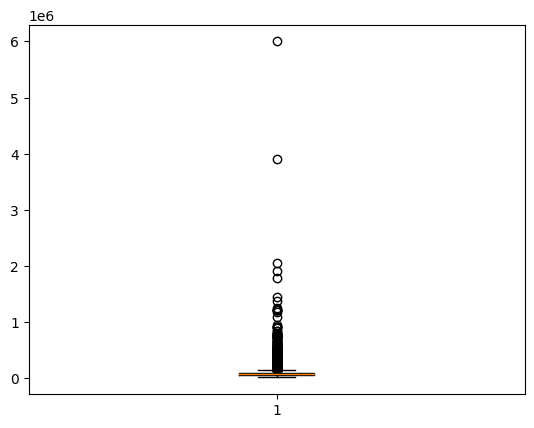

In [179]:
# Next, lets Check the column annual_inc. It seems it has too many outliers. 
plt.boxplot(df2['annual_inc'])
plt.show()
# below plot shows there are clearly some outliers. Lets remove them. 

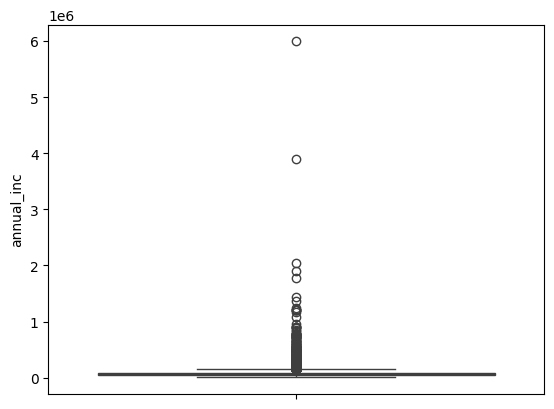

In [180]:
# Same plot using Seaborn library
sns.boxplot(df2.annual_inc)
plt.show()

Box plot shows that there are outliers. To remove them, we need to defin e the percentile point till which we will keep the data. 

In [181]:
# Lets check the values present in diffrent ranges.
df2['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.00
0.75     83199.99
0.90    117000.00
0.95    143975.00
0.97    168000.00
0.98    190000.00
0.99    235000.00
Name: annual_inc, dtype: float64

In [182]:
df2['annual_inc'].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [183]:
# Above details show us big jump in the 90th %ile and 99 %ile. Lets check similar details using describe()
df2['annual_inc'].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [184]:
# Based on the above 2 results, we can understand that we have to get rid of data > 95 %ile
df3 = df2[df2['annual_inc']<=df2['annual_inc'].quantile(0.95)]
df3.shape

(36709, 44)

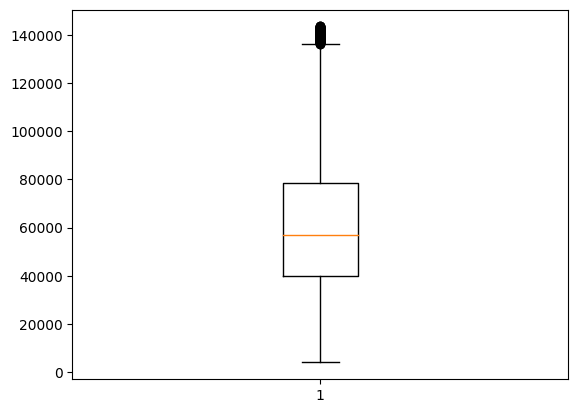

In [185]:
# Lets check the same details again 
plt.boxplot(df3['annual_inc'])
plt.show()
# Now we see our data correctly.

There are 2 more columns which might have the outliers. Those are loan_amnt and funded_amnt_inv. Lets check those columns as well.

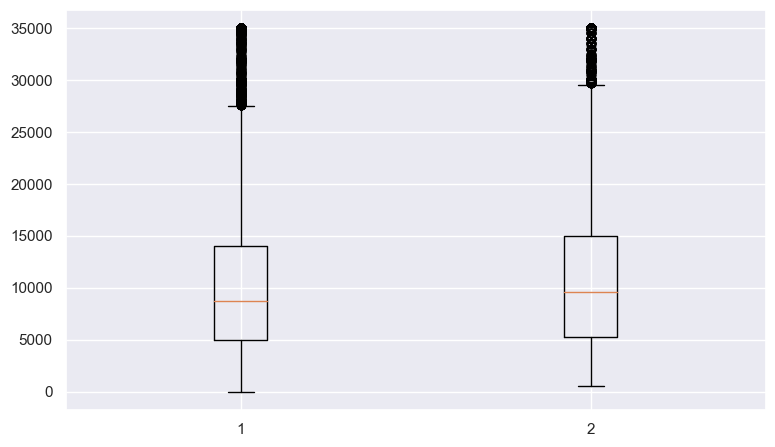

In [188]:
# using Seaborn as default library now onwards.
sns.set()
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([0,0, 1,1])
bp = ax.boxplot([df3['funded_amnt_inv'], df3['loan_amnt']])
plt.show()
# Above plot shows that both columns have pretty much simillar and equal distribution of the values. No need to remove anything.

In [190]:
# we now have total 53 columns now.
df3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [191]:
df3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [192]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36709 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36709 non-null  int64  
 1   member_id                36709 non-null  int64  
 2   loan_amnt                36709 non-null  int64  
 3   funded_amnt              36709 non-null  int64  
 4   funded_amnt_inv          36709 non-null  float64
 5   term                     36709 non-null  object 
 6   int_rate                 36709 non-null  float64
 7   installment              36709 non-null  float64
 8   grade                    36709 non-null  object 
 9   sub_grade                36709 non-null  object 
 10  emp_title                35438 non-null  object 
 11  emp_length               36709 non-null  int64  
 12  home_ownership           36709 non-null  object 
 13  annual_inc               36709 non-null  float64
 14  verification_status      36

In [199]:
df3.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    34519
1.0     1526
2.0        6
Name: count, dtype: int64

In [200]:
df3.pub_rec_bankruptcies.isnull().sum()

658

In [201]:
df3.collection_recovery_fee.value_counts()

collection_recovery_fee
0.0000      33202
2.0000         12
3.7100          9
1.2000          9
1.6000          8
            ...  
11.9195         1
202.7340        1
4.3100          1
1.4250          1
0.2300          1
Name: count, Length: 2440, dtype: int64

Till now we have removed below columns.

In [198]:
# so far we have removed below columns.
print(remove_col1)
print(remove_col2)

['mths_since_last_record', 'next_pymnt_d', 'desc', 'mths_since_last_delinq']
['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [202]:
# as of now we have only 48 columns.
df3.shape

(36709, 44)

In [203]:
df3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [204]:
# we have few columns which has only single value.
df3.columns[df3.nunique()==1]

Index([], dtype='object')

In [207]:
df3['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [208]:
df3['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    34519
1.0     1526
2.0        6
Name: count, dtype: int64

In [209]:
# We see there are 1526 ppl who has declared bankcruptcies 1 time and 6 ppl who has done it 2 times. 
# There are also some Null values. Lets remove them and keep other values.
df4 = df3[~(df3['pub_rec_bankruptcies'].isnull())]
df4.shape

(36051, 44)

In [210]:
#We need to update the row count variable.
print('Earlier row count was ' + str(row_count))
curr_row_count=df4.shape[0]
print('Current row count is ' + str(curr_row_count))

Earlier row count was 39717
Current row count is 36051


In [211]:
# Rechecking the columns with blank / null values in them. 
100*(df4.isnull().sum()/row_count)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  3.096911
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
url                        0.000000
purpose                    0.000000
title                      0.025178
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0

In [212]:
# Rechecking the columns with blank / null values in them. 
df.columns[100*(df4.isnull().sum()/row_count)==0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 44

In [213]:
# Rechecking the columns with blank / null values in them. 
df4.columns[100*(df4.isnull().sum()/row_count)>0]

Index(['emp_title', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [214]:
#Above colunms have some null values. Lets check them one by one.
# 1. emp_title
df4['emp_title'].isnull().sum()

1230

In [215]:
# 2. title
df4['title'].isnull().sum()

10

In [216]:
# 3. revol_util
df4['revol_util'].isnull().sum()

45

In [217]:
# 4. last_pymnt_d
df4.last_pymnt_d.isnull().sum()

66

In [218]:
# 5. last_credit_pull_d
df4.last_credit_pull_d.isnull().sum()

1

In [231]:
# Empty ros are very less compared to our total rows. So removing the rows with null values in those 5 cols. 
df5=df4[~df4.emp_title.isnull()]
df5=df5[~df5.emp_length.isnull()]
df5=df5[~df5.title.isnull()]
df5=df5[~df5.revol_util.isnull()]
df5=df5[~df5.last_pymnt_d.isnull()]

In [232]:
df5.shape

(34708, 44)

In [233]:
#We need to update the row count variable.
print('Earlier row count was ' + str(row_count))
curr_row_count=df5.shape[0]
print('Current row count is ' + str(curr_row_count))

Earlier row count was 39717
Current row count is 34708


In [234]:
# Rechecking the columns with blank / null values in them. No columns with empty values.
df5.columns[100*(df5.isnull().sum()/row_count)>0]

Index([], dtype='object')

Now that our data is clean, let us now check the columns. Which columns should we use for the analysis of which kind.

### Data Analysis

Now we need to check what each column contains what value. Basis that we will analyze the pattern in the data.

In [235]:
df5.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [236]:
# below are the columns we have. 
df5.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Now we can understand that there are few columns which come into picture after the loan is sanctioned. Such columns will not be useful to analyse if customer would default on their loan.

1. 'id', 'member_id' , 'url' are the columns used to give uniqueness to the row. They are not needed.

2. Some columns are there which are required after the loan is given meaning they are current loan parameters. These columns are not required for our analysis. So we will be removing these columns. 

   'inq_last_6mths', 'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d' , 'open_acc', 'pub_rec', 'policy_code', These columns come after loan is given. Not needed. 

In [237]:
remove_col4 = ['id', 'member_id', 'url', 'title',
       'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
print('Number of columns to be removed are ', len(remove_col4))
remove_col4

Number of columns to be removed are  23


['id',
 'member_id',
 'url',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [238]:
df6 = df5.drop(columns=remove_col4, axis=1)
df6.shape

(34708, 21)

In [239]:
df6.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

Now we need to check if the customer would default or not. That is given to us in loan_status column. So lets check it

In [240]:
df6['loan_status'].value_counts()
#Out of below types, we cant really use Current Loan accounts data. We can only use Fully Paid and Charged Off. 

loan_status
Fully Paid     28952
Charged Off     4768
Current          988
Name: count, dtype: int64

In [241]:
# so Lets remove ongoing loans.
df7 = df6[~(df6['loan_status']=="Current")]

In [242]:
# This is our final dataset.
df7.shape

(33720, 21)

In [243]:
# Lets check our target column.
df7['loan_status'].value_counts()

loan_status
Fully Paid     28952
Charged Off     4768
Name: count, dtype: int64

In [244]:
# We understand that our Mean of the colunmns is 
df7['loan_status'].value_counts()*100/df7.shape[0]

loan_status
Fully Paid     85.860024
Charged Off    14.139976
Name: count, dtype: float64

#### Lets create some functions to understand the dataset. We will analyse all the columns against the target column 'loan_status'

In [245]:
print('Mean of the Loan Amount' , df7.groupby('loan_status')['loan_amnt'].mean())
print('-'*40)
print('Median of the Loan Amount' , df7.groupby('loan_status')['loan_amnt'].median())

Mean of the Loan Amount loan_status
Charged Off    12012.180159
Fully Paid     10598.329131
Name: loan_amnt, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    10000.0
Fully Paid      9250.0
Name: loan_amnt, dtype: float64


In [246]:
df7.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,12012.180159,7889.256446,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,28952.0,10598.329131,6885.511141,500.0,5100.0,9250.0,14500.0,35000.0


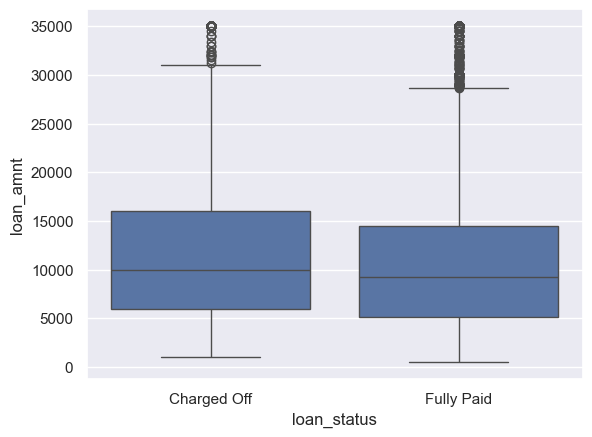

In [247]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df7)
plt.show()

In [248]:
#Lets add this to important features list.
imp_features=[]
# loan amount seems important for analysis
imp_features.append('loan_amt')

In [249]:
print('Mean of the Funded Loan Amount' , df7.groupby('loan_status')['funded_amnt'].mean())
print('-'*40)
print('Median of the Loan Amount' , df7.groupby('loan_status')['funded_amnt'].median())

Mean of the Funded Loan Amount loan_status
Charged Off    11673.107173
Fully Paid     10361.772071
Name: funded_amnt, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    10000.0
Fully Paid      9000.0
Name: funded_amnt, dtype: float64


In [250]:
df7.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,11673.107173,7569.297607,1000.0,5743.75,10000.0,16000.0,35000.0
Fully Paid,28952.0,10361.772071,6654.200616,500.0,5000.00,9000.0,14000.0,35000.0


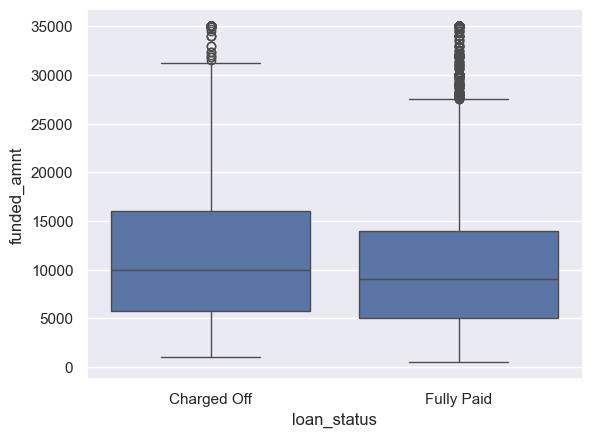

In [251]:
sns.boxplot(x='loan_status', y='funded_amnt', data=df7)
plt.show()

In [252]:
print('Mean of the Funded Loan Amount' , df7.groupby('loan_status')['funded_amnt_inv'].mean())
print('-'*40)
print('Median of the Loan Amount' , df7.groupby('loan_status')['funded_amnt_inv'].median())

Mean of the Funded Loan Amount loan_status
Charged Off    11001.815642
Fully Paid      9978.765672
Name: funded_amnt_inv, dtype: float64
----------------------------------------
Median of the Loan Amount loan_status
Charged Off    9700.0
Fully Paid     8550.0
Name: funded_amnt_inv, dtype: float64


In [253]:
df7.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4768.0,11001.815642,7436.757853,0.0,5000.0,9700.0,15000.0,35000.0
Fully Paid,28952.0,9978.765672,6568.238322,0.0,5000.0,8550.0,13550.0,35000.0


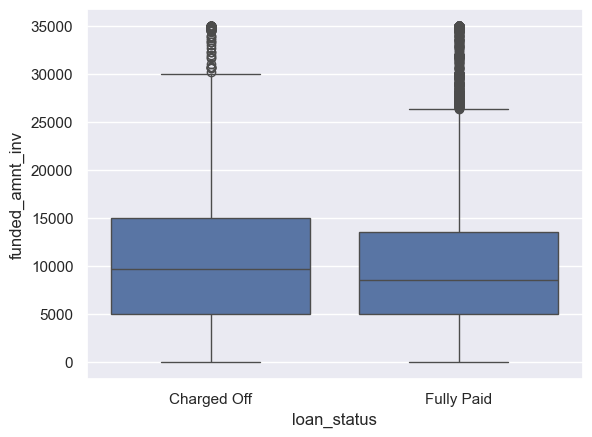

In [254]:
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=df7)
plt.show()

Above graph shows that the mean value of funded amount invested is little higher for Charged Off loans. 

Lets check Term of the loan next.

In [255]:
df7.groupby('loan_status')['term'].value_counts()

loan_status  term      
Charged Off   36 months     2639
              60 months     2129
Fully Paid    36 months    22588
              60 months     6364
Name: count, dtype: int64

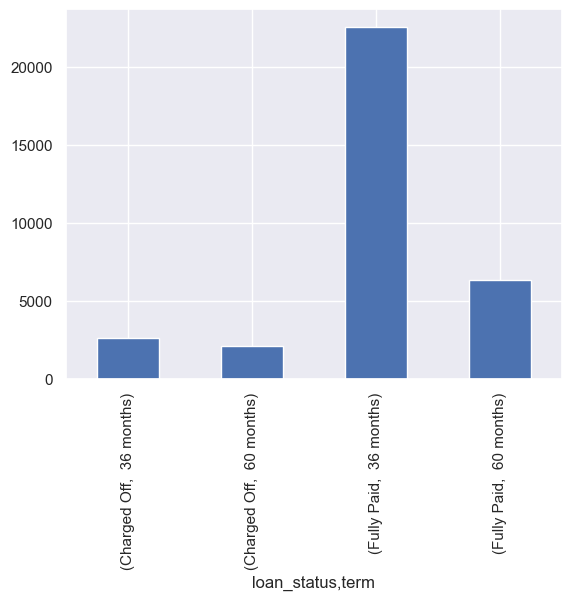

In [256]:
df7.groupby('loan_status')['term'].value_counts().plot(kind='bar')
plt.show()

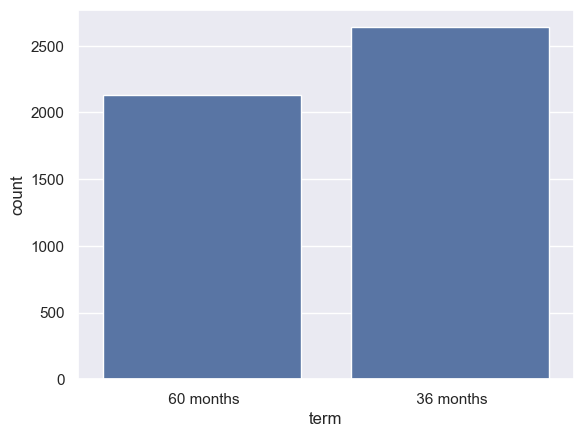

In [261]:
# Charged Off loans seems little high in number for 36 months term. Lets plot the graph for only those criteria.
sns.countplot(x='term', data=df7[df7['loan_status']=='Charged Off'])
plt.show()
#We see that there are more charged of loans for Term of 36 months. That means Short term loans are high risk.

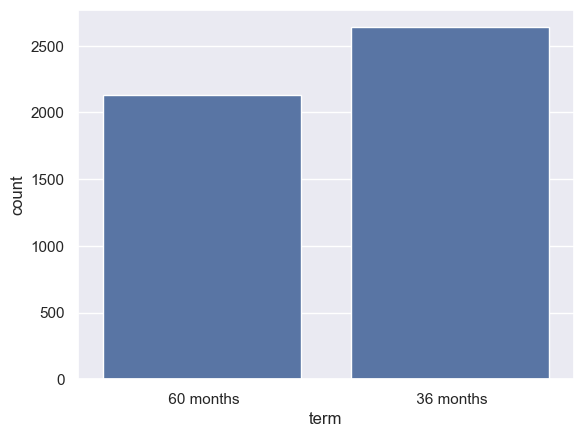

In [262]:
# Charged Off loans seems little high in number for 36 months term. Lets plot the graph for only those criteria.
sns.countplot(x='term', data=df7[df7['loan_status']=='Charged Off'])
plt.show()
#We see that there are more charged of loans for Term of 36 months. That means Short term loans are high risk.

Grade is one more column we have. Now that is a categorical column. Lets sort it and check it. 

In [263]:
ordered_grades=df7.grade.unique()
ordered_grades.sort()
ordered_grades

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [264]:
df1['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

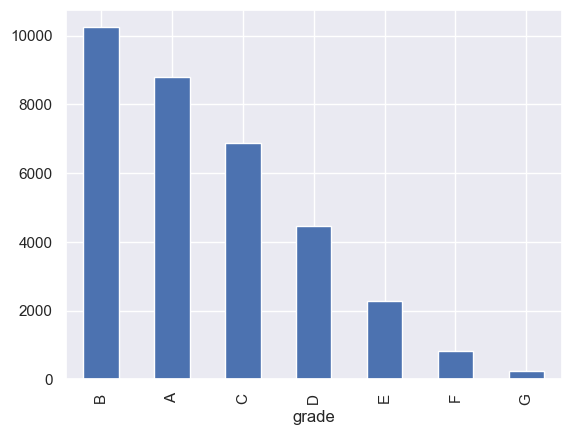

In [265]:
df7['grade'].value_counts().plot(kind='bar')
plt.show()

We see that there is clearly an order in them. Lets check grades againsts our target column.

Text(0.5, 1.0, 'Distribution of Term For Grades for all cases')

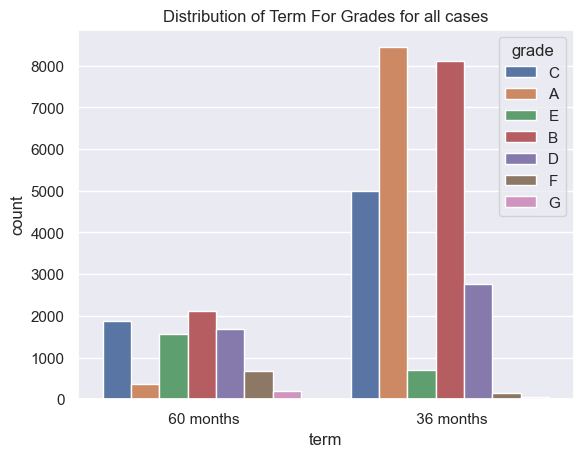

In [266]:
sns.countplot(x='term', data=df7, hue='grade')
plt.title('Distribution of Term For Grades for all cases')

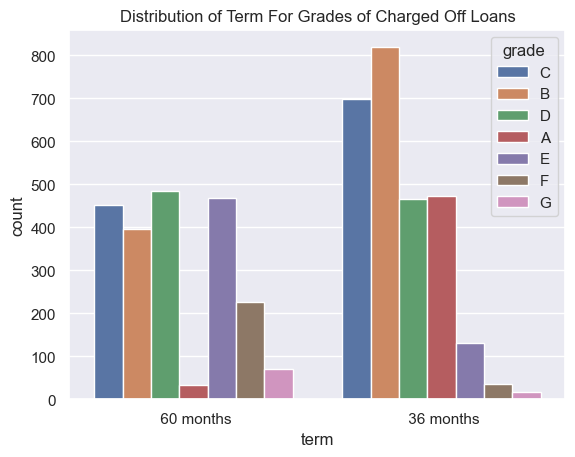

In [267]:
sns.countplot(x='term', data=df7[df7['loan_status']=='Charged Off'], hue='grade')
plt.title('Distribution of Term For Grades of Charged Off Loans')
plt.show()

We can see that for 60 Months term, Grade C, B, D, E are having high charged off loans. 

We can see that for 36 Months term, Grade C, B, D, A are having high charged off loans. 

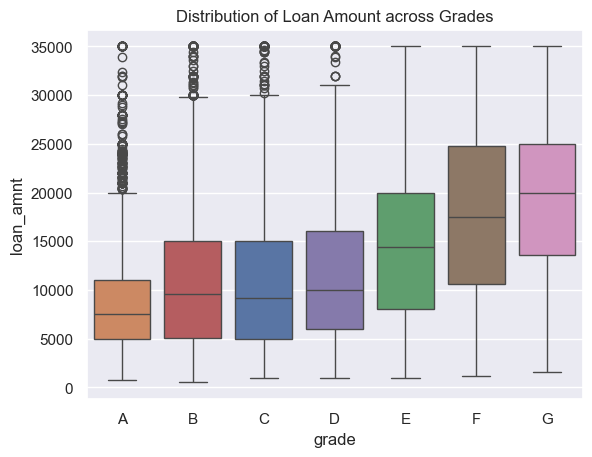

In [269]:
sns.boxplot(x='grade',y='loan_amnt', data=df7, order=ordered_grades, hue='grade')
plt.title('Distribution of Loan Amount across Grades')
plt.show()

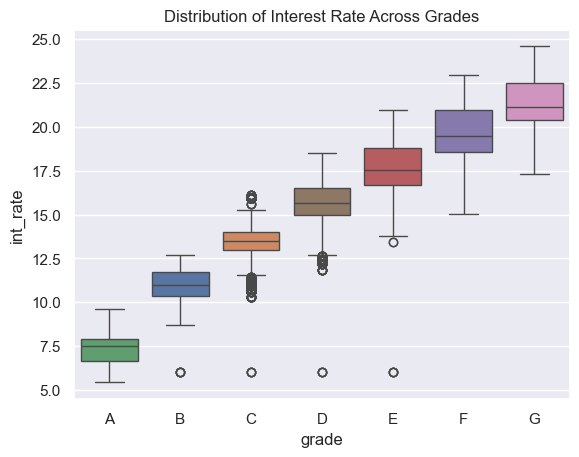

In [271]:
sns.boxplot(x='grade', y='int_rate', data=df1, order=ordered_grades, hue='grade')
plt.title('Distribution of Interest Rate Across Grades')
plt.show()

For the grades A to G, the loan amount increases and also the interest rate also increases.

Lets check the same thing for only charged off loans. 

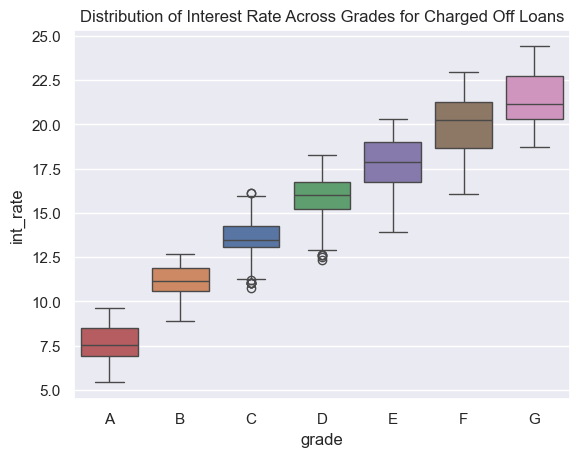

In [272]:
sns.boxplot(x='grade', y='int_rate', data=df7[df7['loan_status']=='Charged Off'], order=ordered_grades, hue='grade')
plt.title('Distribution of Interest Rate Across Grades for Charged Off Loans')
plt.show()

We see that there are higher interest rates are applied to subsequent grades 

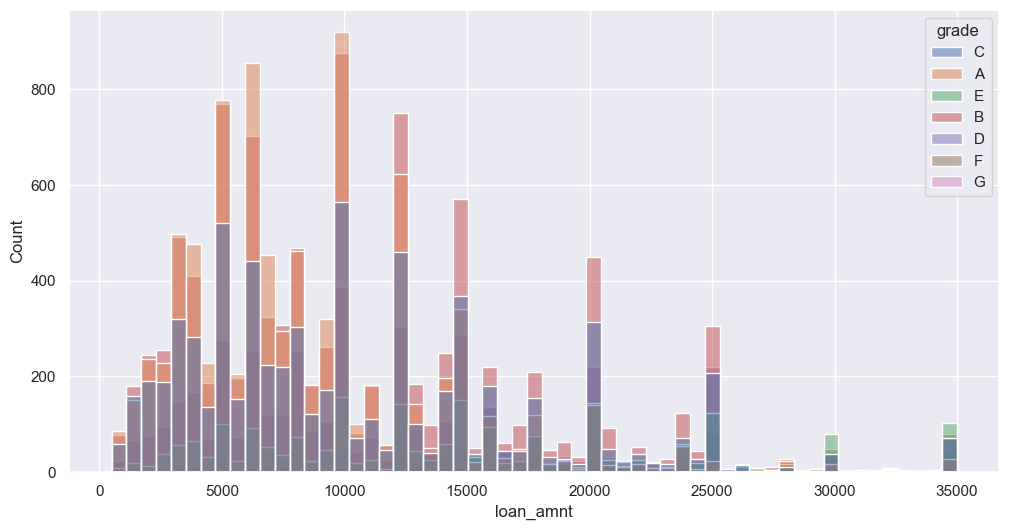

In [273]:
# Lets change figure size to see the plot.
plt.rcParams['figure.figsize'] = (12, 6)
sns.histplot(x = 'loan_amnt', hue = 'grade',data = df7)
plt.show()

In [274]:
# Adding the columns Term and Grades to the Imp features as 
imp_features.append('term')
imp_features.append('grade')

In [275]:
imp_features

['loan_amt', 'term', 'grade']

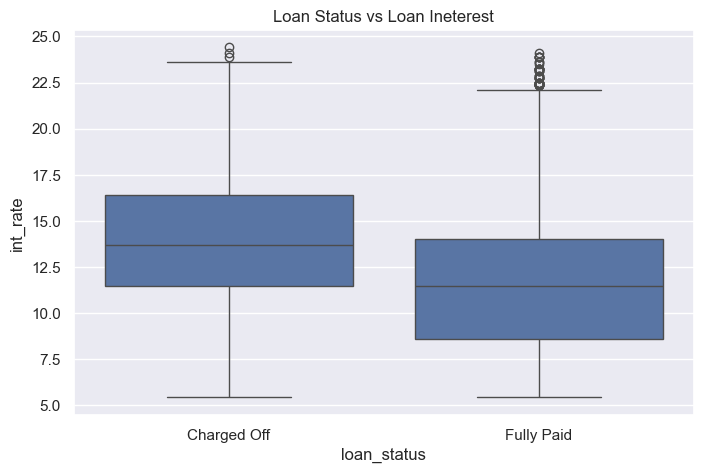

In [282]:
# int_rate is not a useful feature as there are both status records for each term
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxplot(x=df7.loan_status, y=df7.int_rate)
plt.title('Loan Status vs Loan Ineterest')
plt.show()

In [280]:
# int_rate seems higher for the charged off loans. Lets check the values. 
df7.groupby('loan_status')['int_rate'].mean()

loan_status
Charged Off    13.869505
Fully Paid     11.620047
Name: int_rate, dtype: float64

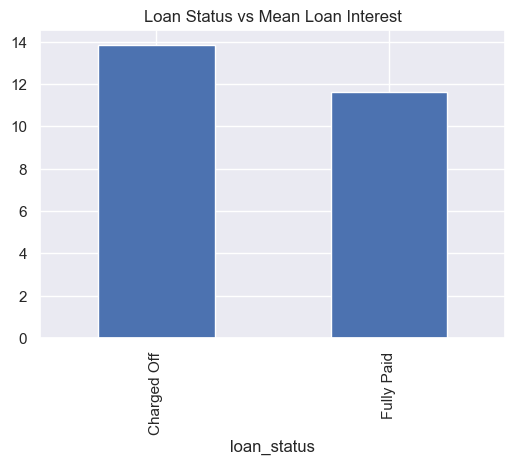

In [283]:
# same details in the bar graph.
plt.rcParams['figure.figsize'] = (6,4)
df7.groupby('loan_status')['int_rate'].mean().plot(kind='bar')
plt.title('Loan Status vs Mean Loan Interest')
plt.show()

In [284]:
#int_rate seems important as the inerest rate is high for charged off loans. Lets add this to important features list.
imp_features.append('int_rate')

We know that int_rate is imp. But it also changes based on the loan amount. So lets check same details against loan_amt.

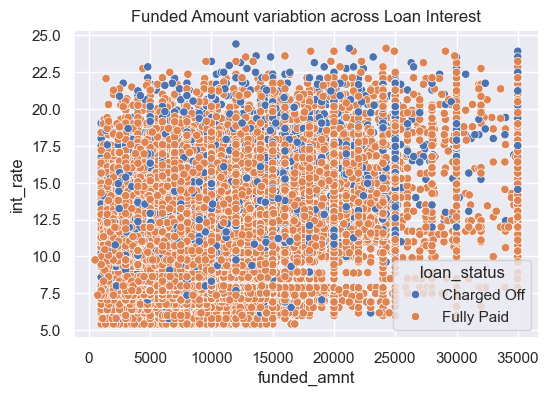

In [288]:
# Loan Amount column shows the charged off values for higher interest rates.
sns.scatterplot(x=df7.funded_amnt, y=df7.int_rate, hue=df7.loan_status)
plt.title('Funded Amount variabtion across Loan Interest')
plt.show()

Here, we see that the Charged Off loans are spread across all the loan amounts. And they do have higher rate of interest. 

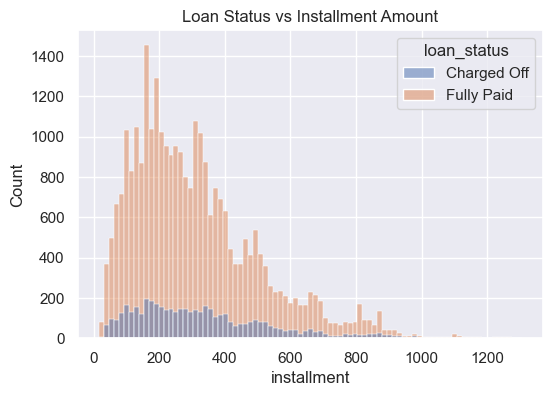

In [289]:
# Lets check if Installment Amount makes any difference on out target column.
sns.histplot(x=df7.installment, hue=df7.loan_status)
plt.title('Loan Status vs Installment Amount')
plt.show()
# Installment amount does not show difference. We find charged off cases across all values of installment. 
# We do see there are some outliers. 

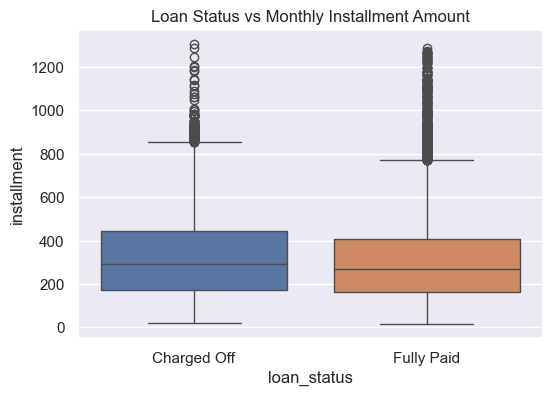

In [291]:
# installment column seems very similar
sns.boxplot(x=df7.loan_status, y=df7.installment, data=df7, hue='loan_status')
plt.title('Loan Status vs Monthly Installment Amount')
plt.show()

In [292]:
df7.groupby('loan_status')['grade'].value_counts()

loan_status  grade
Charged Off  B        1214
             C        1151
             D         950
             E         598
             A         506
             F         262
             G          87
Fully Paid   B        9027
             A        8300
             C        5723
             D        3498
             E        1682
             F         561
             G         161
Name: count, dtype: int64

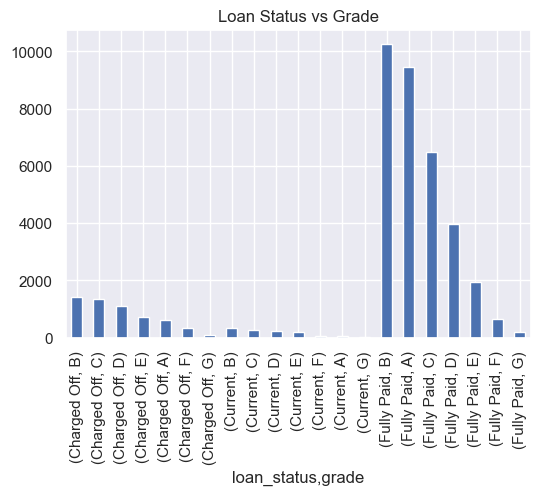

In [294]:
df1.groupby('loan_status')['grade'].value_counts().plot(kind='bar')
plt.title('Loan Status vs Grade')
plt.show()

# we already did this. But we did not check the Sub Grade column

Apart from Grade column we also have a Sub grade column. Lets check that too. 

In [295]:
df1.groupby('loan_status')['sub_grade'].value_counts()

loan_status  sub_grade
Charged Off  B5           356
             B3           341
             C1           336
             B4           329
             C2           321
                         ... 
Fully Paid   F5            59
             G2            49
             G4            41
             G3            26
             G5            19
Name: count, Length: 101, dtype: int64

<Axes: xlabel='loan_status,sub_grade'>

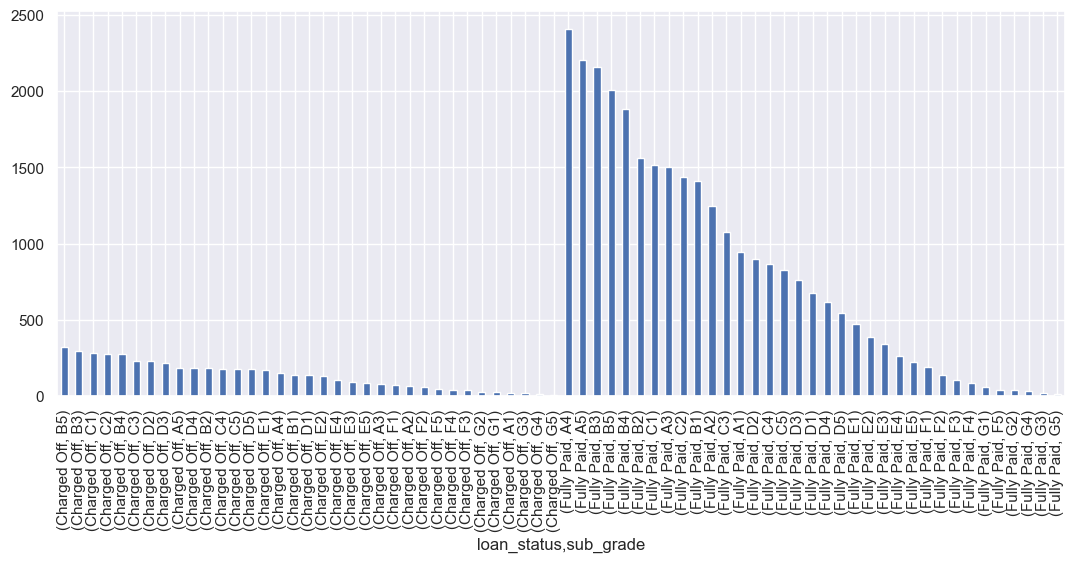

In [296]:
plt.rcParams['figure.figsize'] = (13,5)
df7.groupby('loan_status')['sub_grade'].value_counts().plot(kind='bar')

This does not tell us the impact. Lets create another plot.

In [129]:
# Lets change figure size to see the plot.
plt.rcParams['figure.figsize'] = (12, 3)

In [ ]:
df7.sub_grade.

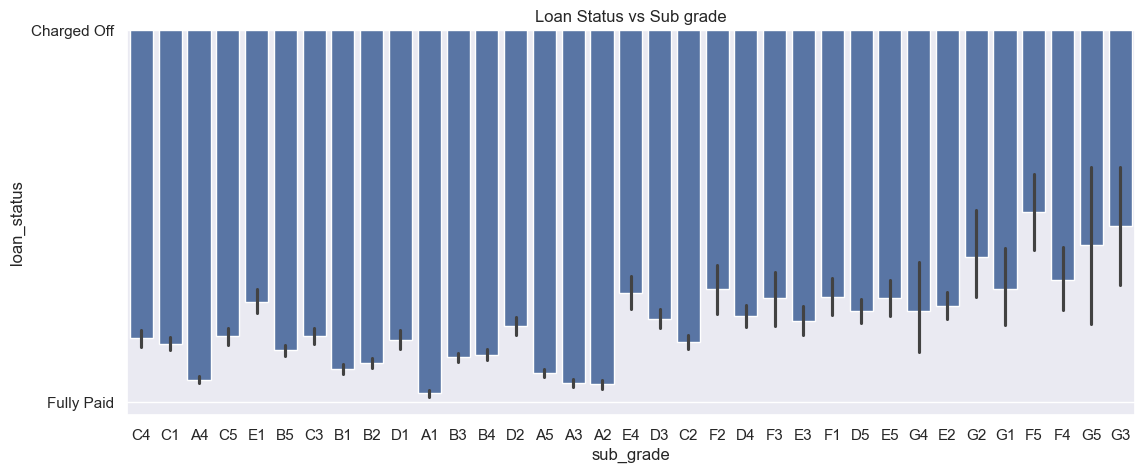

In [297]:
sns.barplot(x = df7.sub_grade, y = df7.loan_status)
plt.title('Loan Status vs Sub grade')
plt.show()

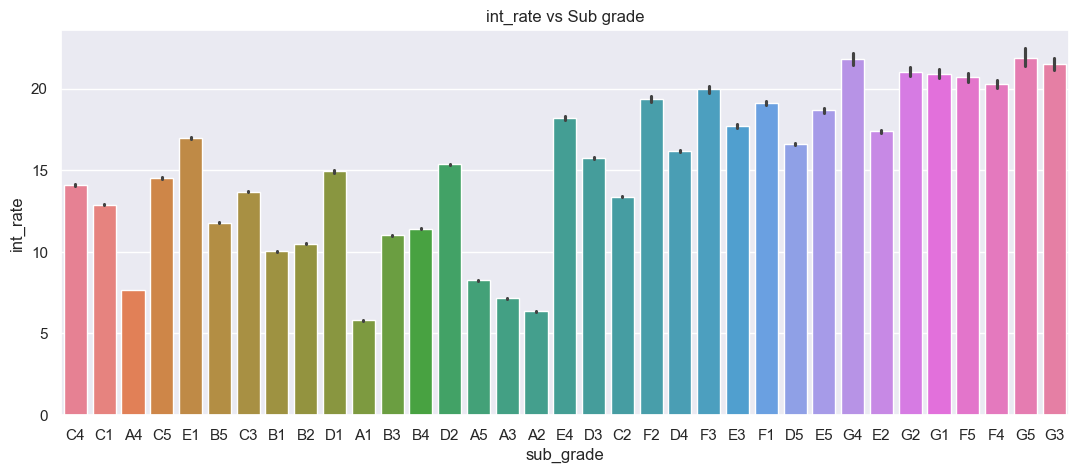

In [301]:
sns.barplot(x = df7.sub_grade, y = df7.int_rate, hue=df7.sub_grade)
plt.title('int_rate vs Sub grade')
plt.show()

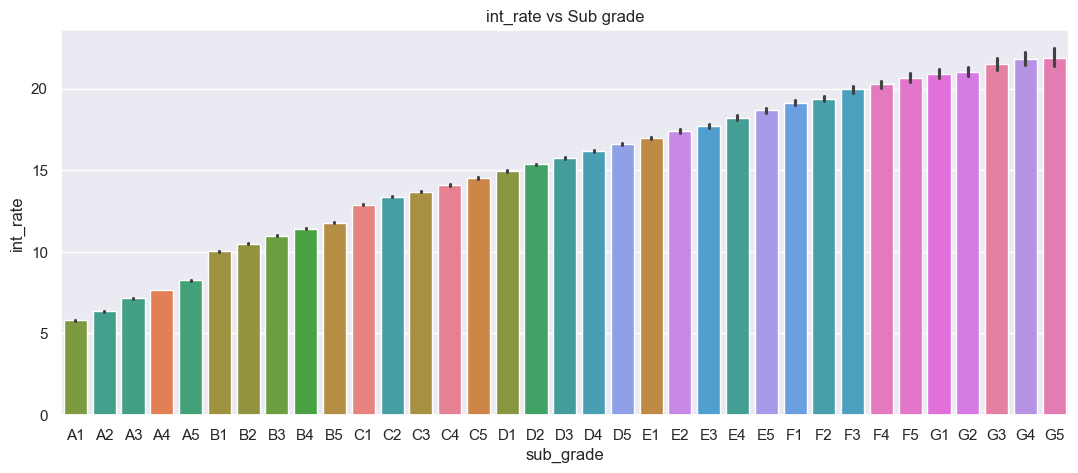

In [307]:
sns.barplot(x = df7.sub_grade, y = df7.int_rate, hue=df7.sub_grade, order=sorted(df7.sub_grade.unique()))
plt.title('int_rate vs Sub grade')
plt.show()

Here we can understand that Interest rate was higher for different subgrades. 

Grades were the risk factor based on which the rate of interest was increased.

In [308]:
# Lets check emp_length: Remaining employment in years column
df7.groupby('loan_status')['emp_length'].mean()

loan_status
Charged Off    5.136745
Fully Paid     4.917760
Name: emp_length, dtype: float64

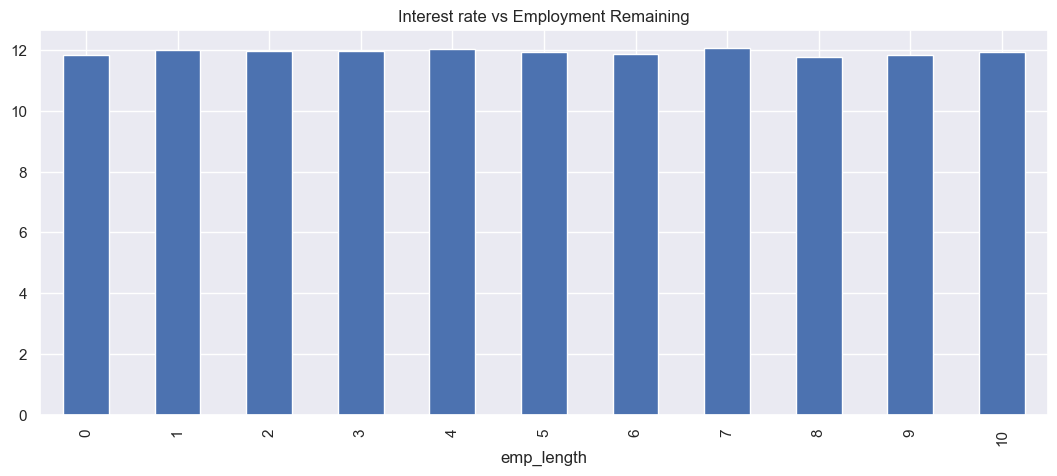

In [309]:
# lets check if int_rate varies across emp_length
df7.groupby('emp_length')['int_rate'].mean().plot(kind='bar')
plt.title('Interest rate vs Employment Remaining')
plt.show()
# Mean rate of interest is almost similar across all emp length.

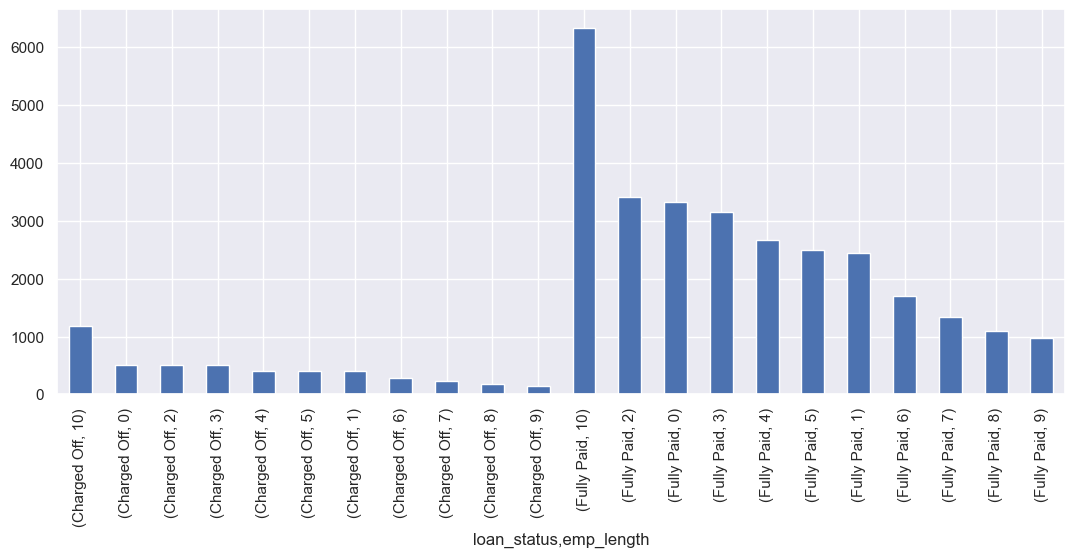

In [310]:
df7.groupby('loan_status')['emp_length'].value_counts().plot(kind='bar')
plt.show()
# emp_length is not a useful feature as there are all the lengths for each status

In [311]:
plt.rcParams['figure.figsize'] = (8, 5)

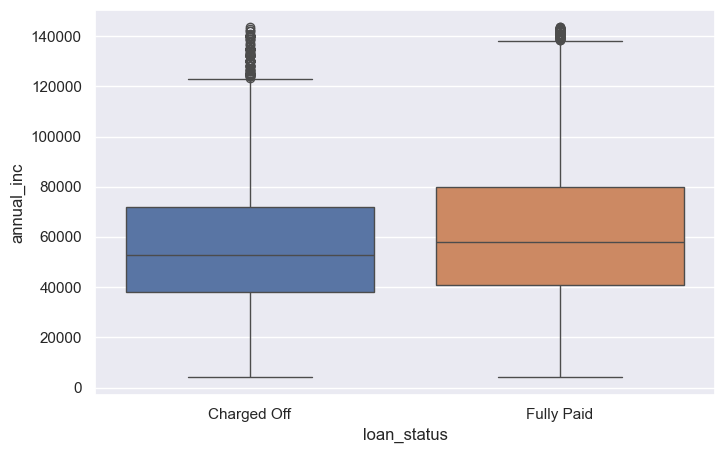

In [314]:
# lets check annual income variation
sns.boxplot(x='loan_status',y='annual_inc',data=df7, hue='loan_status')
plt.show()

In [315]:
print('Mean of the Annual income for all ', df7.groupby('loan_status')['annual_inc'].mean())
print('-'*40)
print('Median of the Annual income for all ', df7.groupby('loan_status')['annual_inc'].median())
print('-'*40)
print('Minimum Annual income for all ', df7.groupby('loan_status')['annual_inc'].min())
print('-'*40)
print('Maximum Annual income for all ', df7.groupby('loan_status')['annual_inc'].max())

Mean of the Annual income for all  loan_status
Charged Off    57329.587827
Fully Paid     62365.313874
Name: annual_inc, dtype: float64
----------------------------------------
Median of the Annual income for all  loan_status
Charged Off    52800.0
Fully Paid     58000.0
Name: annual_inc, dtype: float64
----------------------------------------
Minimum Annual income for all  loan_status
Charged Off    4080.0
Fully Paid     4000.0
Name: annual_inc, dtype: float64
----------------------------------------
Maximum Annual income for all  loan_status
Charged Off    143500.0
Fully Paid     143500.0
Name: annual_inc, dtype: float64


1. We see that the Mean of Charged Off Loans is little less and so is the median.

2. Maximum and the Minimum values are almost simillar. 

In [316]:
# lets check other columns
df7.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

In [317]:
df7.verification_status.value_counts()

verification_status
Not Verified       14521
Verified           10490
Source Verified     8709
Name: count, dtype: int64

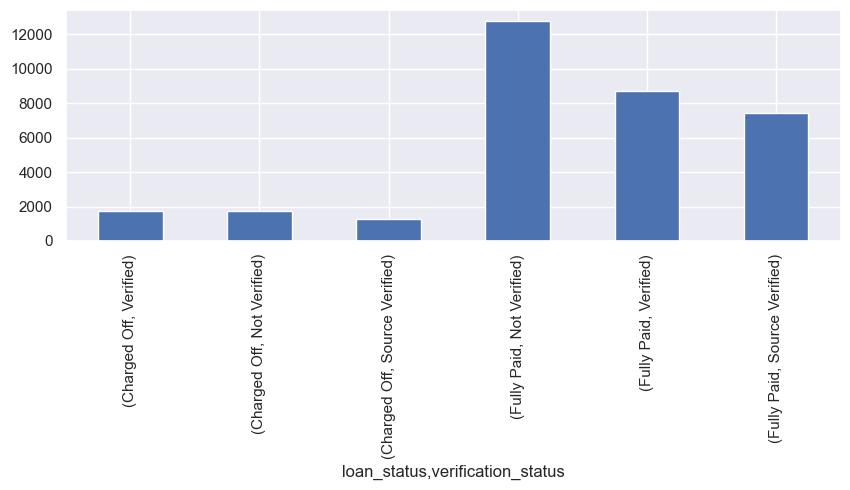

In [320]:
# verification_status column has chanrged off values.
plt.rcParams['figure.figsize'] = (10, 3)
df7.groupby('loan_status')['verification_status'].value_counts().plot(kind='bar')
plt.show()

Charged off loans are found across all the verification so it does not seemm very imp.

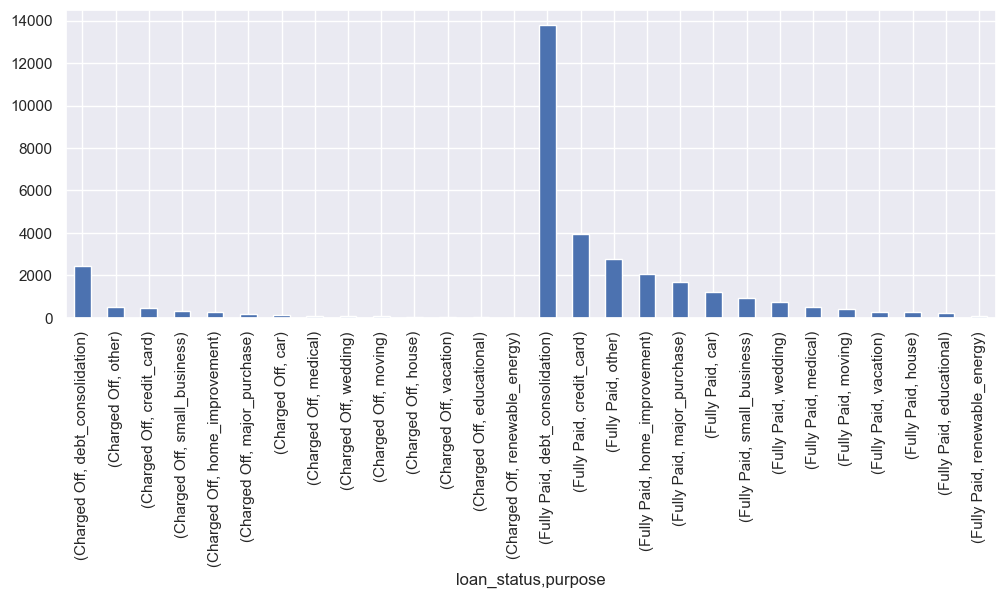

In [323]:
plt.rcParams['figure.figsize'] = (12, 4)
df7.groupby('loan_status')['purpose'].value_counts().plot(kind='bar')
plt.show()

We see there are higher count of loans which are taken for debt_consolidation. Lets check amount as well. 

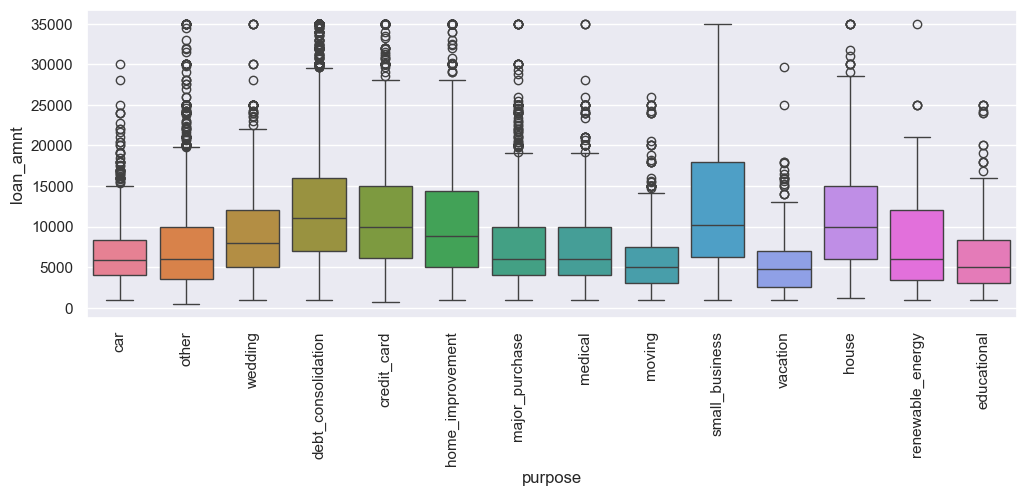

In [325]:
sns.boxplot(x='purpose', y='loan_amnt', data=df7, hue='purpose')
plt.xticks(rotation=90)
plt.show()

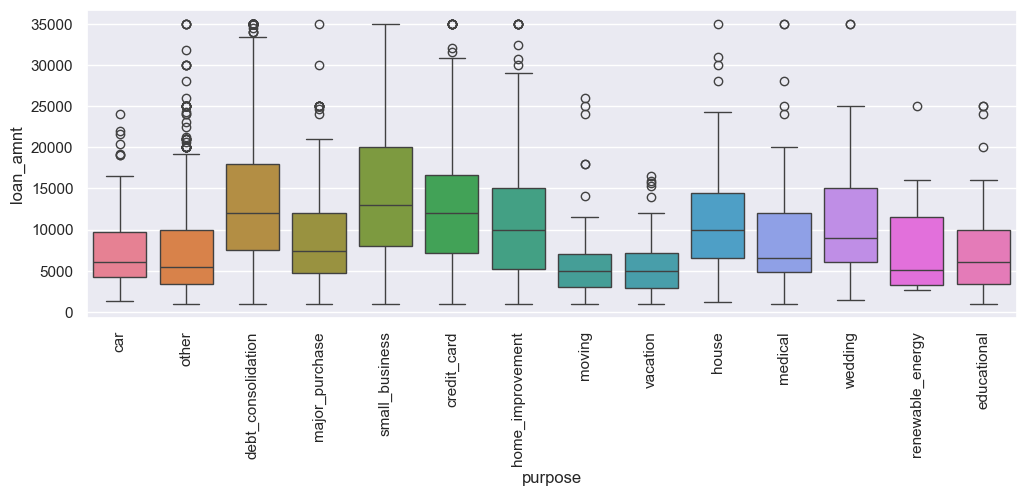

In [327]:
sns.boxplot(x='purpose', y='loan_amnt', data=df7[df7['loan_status']=='Charged Off'],hue='purpose')
plt.xticks(rotation=90)
plt.show()

We see that there are higher chances of default when loan amount > 15k and loan is taken for debt_conslidation, small business and house.

In [329]:
imp_features.append('purpose')
imp_features

['loan_amt', 'term', 'grade', 'int_rate', 'purpose']

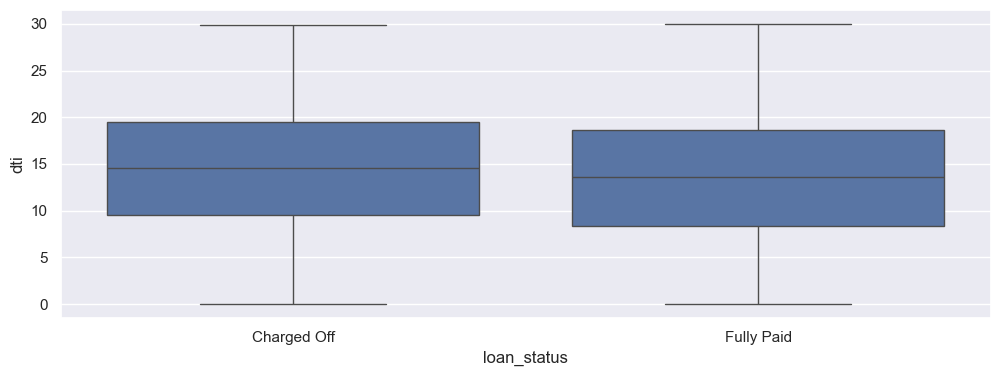

In [330]:
# dti variation  is pretty close
sns.boxplot(x='loan_status',y='dti',data=df7)
plt.show()

In [331]:
print('Mean of the dti for diff loan statuses', df7.groupby('loan_status')['dti'].mean())
print('-'*40)
print('Median of the dti for diff loan statuses', df7.groupby('loan_status')['dti'].median())
print('-'*40)
print('Minimum dti for diff loan statuses', df7.groupby('loan_status')['dti'].min())
print('-'*40)
print('Maximum dti for diff loan statuses', df7.groupby('loan_status')['dti'].max())

Mean of the dti for diff loan statuses loan_status
Charged Off    14.257752
Fully Paid     13.450429
Name: dti, dtype: float64
----------------------------------------
Median of the dti for diff loan statuses loan_status
Charged Off    14.560
Fully Paid     13.555
Name: dti, dtype: float64
----------------------------------------
Minimum dti for diff loan statuses loan_status
Charged Off    0.0
Fully Paid     0.0
Name: dti, dtype: float64
----------------------------------------
Maximum dti for diff loan statuses loan_status
Charged Off    29.85
Fully Paid     29.99
Name: dti, dtype: float64


Mean and Median values are even though marginally different, they are still high for charged off loans. 

Meaning Debt to Income ratio does matter.

In [370]:
imp_features.append('dti')

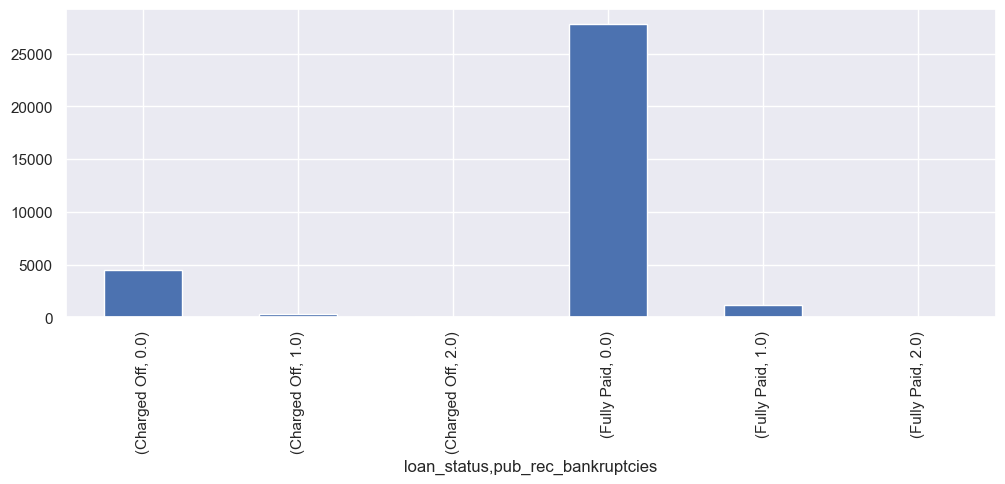

In [334]:
# pub_rec_bankruptcies
df7.groupby('loan_status')['pub_rec_bankruptcies'].value_counts().plot(kind='bar')
plt.show()

In [335]:
# pub_rec_bankruptcies
df7.groupby('loan_status')['pub_rec_bankruptcies'].value_counts()

loan_status  pub_rec_bankruptcies
Charged Off  0.0                      4459
             1.0                       307
             2.0                         2
Fully Paid   0.0                     27826
             1.0                      1123
             2.0                         3
Name: count, dtype: int64

Based on the volumn, it seems higher no of defaulters are with no banckrupties.

In [336]:
df7['home_ownership'].value_counts()

home_ownership
RENT        16660
MORTGAGE    14551
OWN          2420
OTHER          89
Name: count, dtype: int64

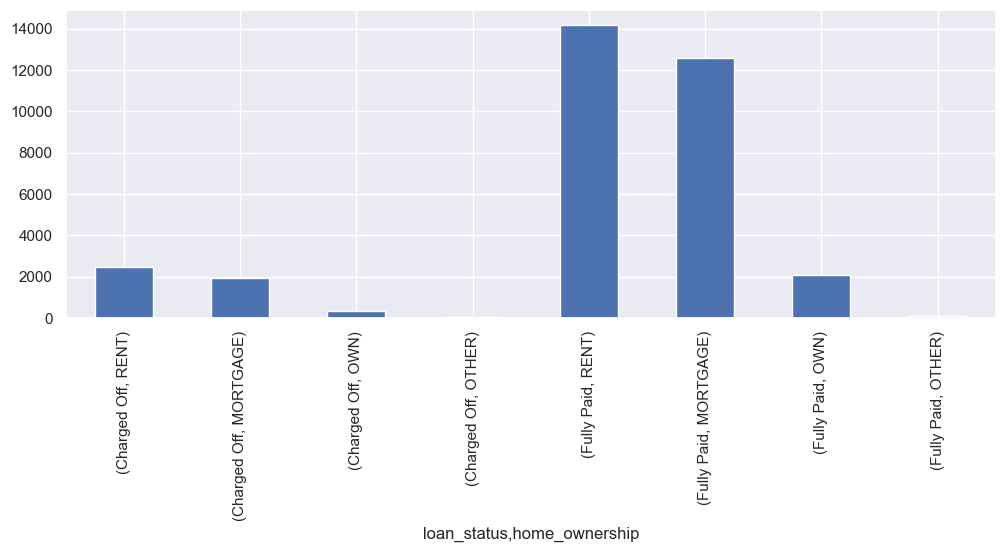

In [337]:
df7.groupby('loan_status')['home_ownership'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='home_ownership', ylabel='count'>

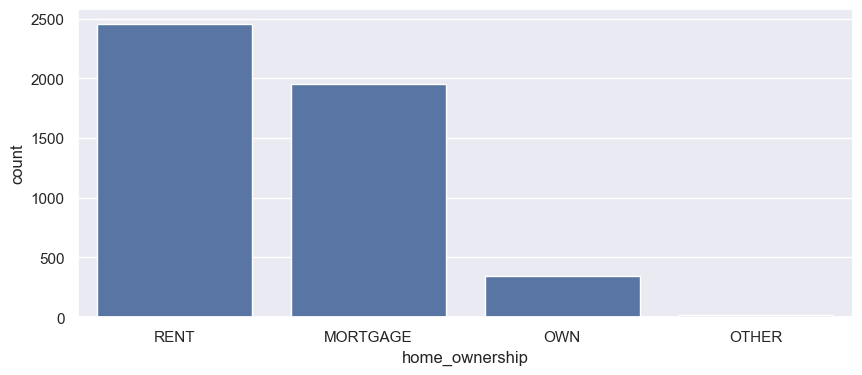

In [338]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(x='home_ownership', data=df7[df7['loan_status']=='Charged Off'])

Thre are large number of defaulters who live in rented home or in mortgaged hoouse. 

In [339]:
imp_features.append('home_ownership')

In [344]:
#looking at the date issued column
df7.issue_d.describe()

count      33720
unique        52
top       Dec-11
freq        1851
Name: issue_d, dtype: object

In [345]:
# Lets check Issue Date. The values we have are as follows.
df1.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [347]:
#From above values we can derive other values such as month, year and quarter. 
#But before that, lets convert Object dtype to Datetime format. Using the below codes for datetime conversion.
# %b - Abbreviated Month name. %y - 2 digit Year
df7['issue_d']=pd.to_datetime(df7['issue_d'], format='%b-%y')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\922664671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['issue_d']=pd.to_datetime(df7['issue_d'], format='%b-%y')


In [348]:
# now lets derive another columns from it. 
df7['issue_year'] = pd.DatetimeIndex(df7['issue_d']).year
df7['issue_month'] = pd.DatetimeIndex(df7['issue_d']).month

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\2447316421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['issue_year'] = pd.DatetimeIndex(df7['issue_d']).year
C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\2447316421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['issue_month'] = pd.DatetimeIndex(df7['issue_d']).month


In [349]:
# issue_quarter column needs to be identified from the month column.
# lets create a function for the same
def create_issue_quarter(col):
    if col <= 3:
        quarter='Q1'
    elif col >= 4 and col <= 6:
        quarter='Q2'
    elif col >= 7 and col <= 9:
        quarter='Q3'
    elif col >= 10 and col <= 12:
        quarter='Q4'
    else:
        quarter='00'
    return quarter

In [350]:
df7['issue_quarter'] = df7.apply(lambda x : create_issue_quarter(x['issue_month']), axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5536\2129278011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['issue_quarter'] = df7.apply(lambda x : create_issue_quarter(x['issue_month']), axis=1)


In [351]:
df7['issue_quarter'].value_counts()

issue_quarter
Q4    10422
Q3     9114
Q2     8014
Q1     6170
Name: count, dtype: int64

In [352]:
df7['issue_quarter'].describe()

count     33720
unique        4
top          Q4
freq      10422
Name: issue_quarter, dtype: object

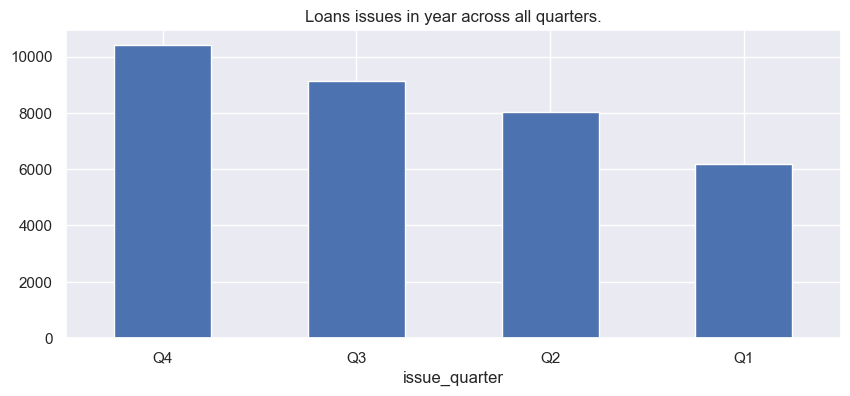

In [353]:
df7['issue_quarter'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Loans issues in year across all quarters.')
plt.show()
# As we see, the max loans have been given in the 3rd and 4h quarters of the year. 

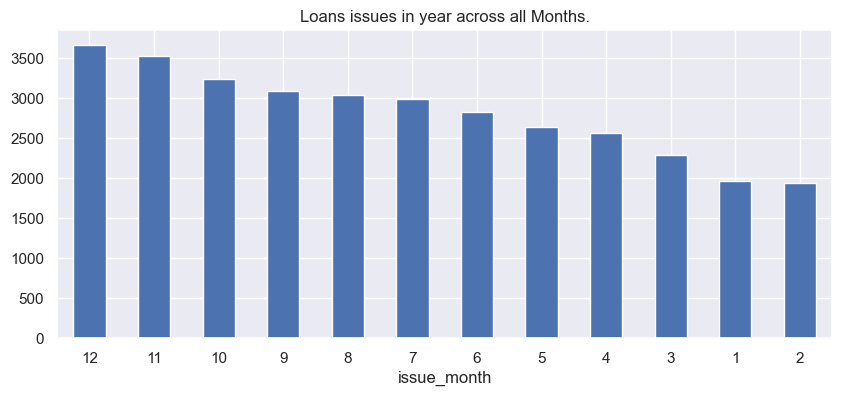

In [354]:
df7['issue_month'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Loans issues in year across all Months.')
plt.show()

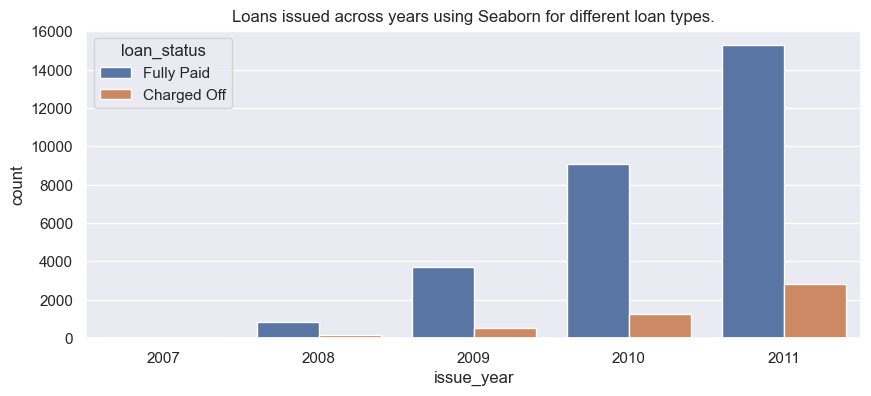

In [355]:
sns.countplot(x='issue_year', data=df7, hue='loan_status')
plt.title('Loans issued across years using Seaborn for different loan types.')
plt.show()

Loan applications are definitely increasing each year.

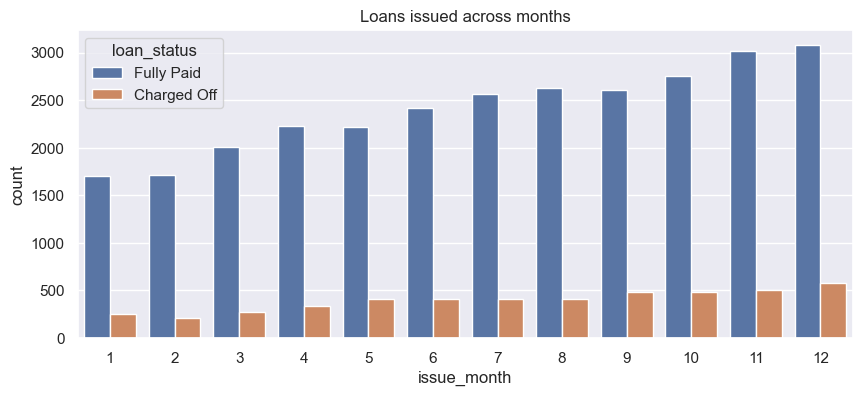

In [357]:
sns.countplot(x='issue_month', data=df7, hue='loan_status')
plt.title('Loans issued across months')
plt.show()
#More loans are taken post March and April. This could be because of festive season

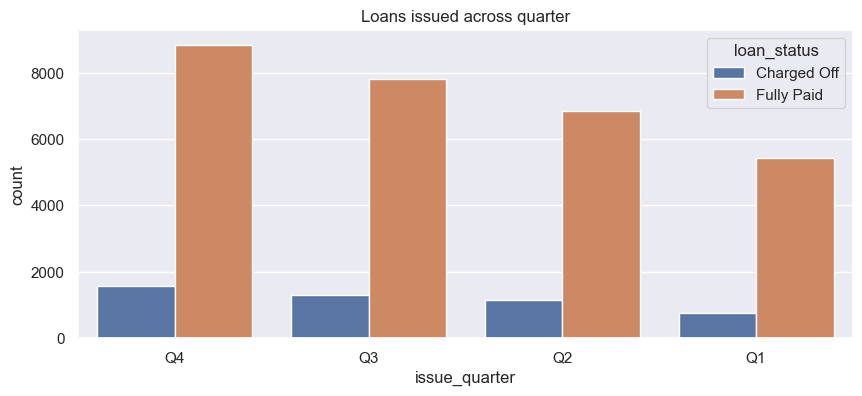

In [359]:
sns.countplot(x='issue_quarter', data=df7, hue='loan_status')
plt.title('Loans issued across quarter')
plt.show()

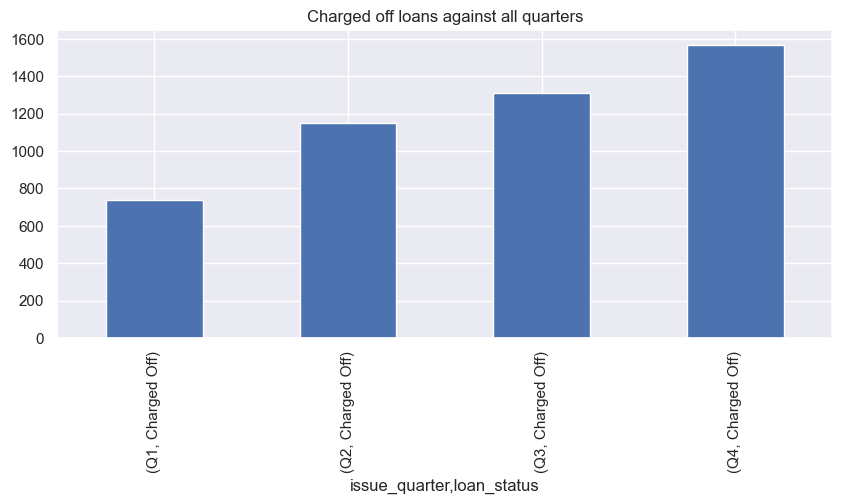

In [360]:
# Lets check only charged off loans
df7[df7['loan_status']=='Charged Off'].groupby('issue_quarter')['loan_status'].value_counts().plot.bar()
plt.title('Charged off loans against all quarters')
plt.show()

Charged Off loans increase as the quarter moves to end of the year. From Q1 to Q4, the amount of defaulters are increased by 2 fold. 

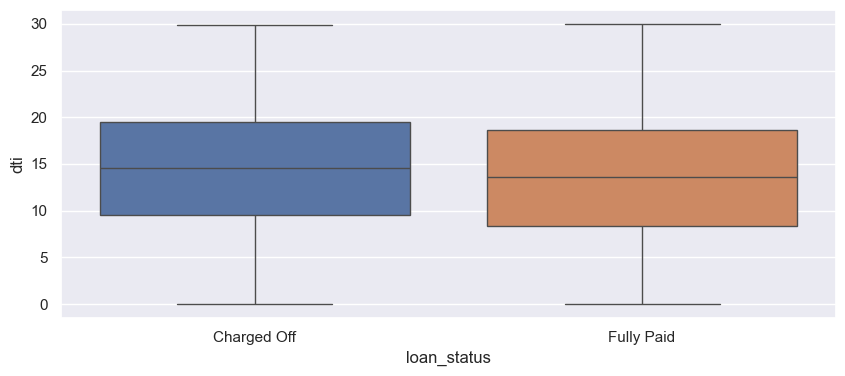

In [361]:
# dti variation is pretty close
sns.boxplot(x='loan_status',y='dti',data=df7, hue='loan_status')
plt.show()

In [363]:
df1.groupby('loan_status')['dti'].mean()

loan_status
Charged Off    14.000624
Current        14.750009
Fully Paid     13.148421
Name: dti, dtype: float64

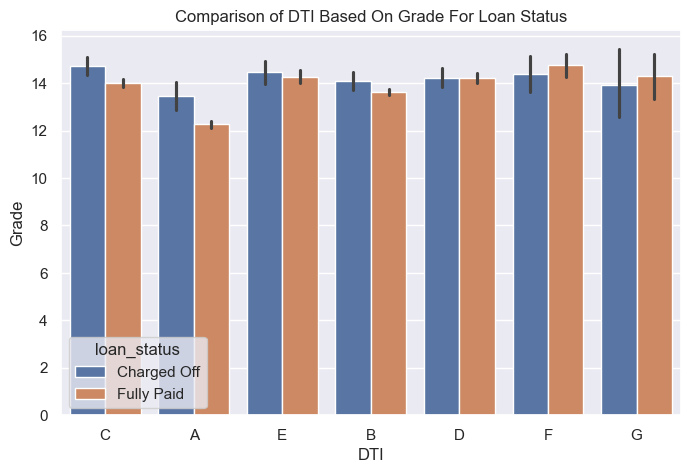

In [369]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(8,5))
sns.barplot(data=df7,y='dti',x='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')
plt.show()

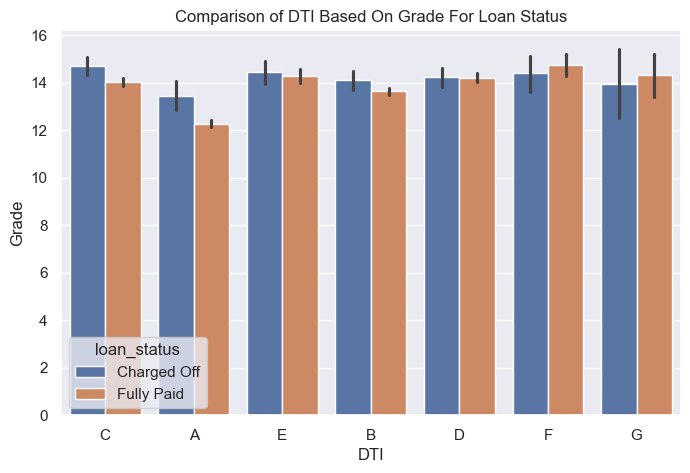

In [407]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(8,5))
sns.barplot(data=df7,y='dti',x='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')
plt.show()

In [381]:
imp_features.append('sub_grade')
imp_features

['loan_amt',
 'term',
 'grade',
 'int_rate',
 'purpose',
 'home_ownership',
 'dti',
 'sub_grade']

In [400]:
imp_features.append('loan_status')

In [409]:
imp_features

['loan_amt',
 'term',
 'grade',
 'int_rate',
 'purpose',
 'home_ownership',
 'dti',
 'sub_grade',
 'loan_status']

In [410]:
df7.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'issue_quarter'],
      dtype='object')

In [420]:
df7.columns[df7.columns.isin(imp_features)]

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'loan_status', 'purpose', 'dti'],
      dtype='object')

In [421]:
df8 = df7.loc[:, df7.columns.isin(imp_features)]
df8.head()

,term,int_rate,grade,sub_grade,home_ownership,loan_status,purpose,dti
1,60 months,15.27,C,C4,RENT,Charged Off,car,1.00
3,36 months,13.49,C,C1,RENT,Fully Paid,other,20.00
5,36 months,7.90,A,A4,RENT,Fully Paid,wedding,11.20
6,60 months,15.96,C,C5,RENT,Fully Paid,debt_consolidation,23.51
7,36 months,18.64,E,E1,RENT,Fully Paid,car,5.35


Creating the correlation matrix for all the columns to understand the dependency

In [422]:
df8['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [423]:
df9['term_int'] = df8['term'].apply(lambda x: 1 if x ==' 60 months' else (0 if x ==' 36 months' else 100) )
df9['term_int'].unique()

array([1, 0], dtype=int64)

In [424]:
df8.head()

,term,int_rate,grade,sub_grade,home_ownership,loan_status,purpose,dti
1,60 months,15.27,C,C4,RENT,Charged Off,car,1.00
3,36 months,13.49,C,C1,RENT,Fully Paid,other,20.00
5,36 months,7.90,A,A4,RENT,Fully Paid,wedding,11.20
6,60 months,15.96,C,C5,RENT,Fully Paid,debt_consolidation,23.51
7,36 months,18.64,E,E1,RENT,Fully Paid,car,5.35


In [401]:
print('Major Facrots driving the Defaulted Loans are below')
print(imp_features)

Major Facrots driving the Defaulted Loans are below
['loan_amt', 'term', 'grade', 'int_rate', 'purpose', 'home_ownership', 'dti', 'sub_grade', 'loan_status']


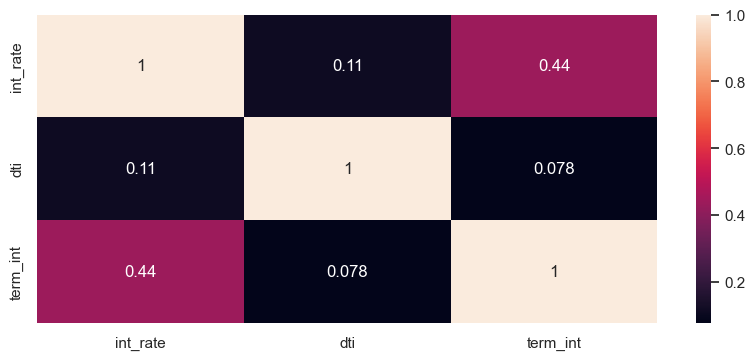

In [395]:
sns.heatmap(df8.corr(), annot=True)
plt.show()

In [399]:
df8.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'purpose',
       'dti', 'term_int'],
      dtype='object')

In [428]:
df8.head()

,term,int_rate,grade,sub_grade,home_ownership,loan_status,purpose,dti
1,60 months,15.27,C,C4,RENT,Charged Off,car,1.00
3,36 months,13.49,C,C1,RENT,Fully Paid,other,20.00
5,36 months,7.90,A,A4,RENT,Fully Paid,wedding,11.20
6,60 months,15.96,C,C5,RENT,Fully Paid,debt_consolidation,23.51
7,36 months,18.64,E,E1,RENT,Fully Paid,car,5.35


##  Inferences
#### Purpose 
We see there are higher count of loans which are taken for debt_consolidation.
#### Grade and Sub Grade
The Grade and Sub Grade represent risk factor thus we can say interst rate increases with the risk.
The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
#### Public Recorded Bankruptcy
The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.
#### Term
The majority of loan has a term of 36 months compared to 60 months.
The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
#### Interest Rate
The default loan amount increases with interest rate 
#### Invested Amount
Mean value of funded amount invested is little higher for Charged Off loans. Meaning loan amount can be lowered